<a href="https://colab.research.google.com/github/tlyonsSETU/Mathematical-Fundamentals/blob/main/Mathematics%20Fundamentals%20-%20Workbook%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics Fundamentals - Python Workbook 2

## BSc Computing (ACCS) - Year 1

# South East Technological University - Waterford

---


# Topics - Matrices and Vectors
## Items Covered:

1. Interpreting $2\times 2$ matrices in 2D




## Calling the python libraries and functions


* In the cell below the necessary Python libraries and functions are imported, which will be needed for the current work book


In [2]:
import matplotlib.pyplot as plt  ## Library of functions for 2D plotting
import numpy as np ## Library of function for numerical work

from mpl_toolkits.mplot3d import Axes3D # Import the functions for creating 3D plots

from ipywidgets import widgets, interact, interactive, fixed, interact_manual # Import widgets for interactive plots
from IPython.display import clear_output # A function to clear interactive plots before each update

from matplotlib import animation # A function to create an animation
from IPython.display import HTML # For creating HTML animation whcih can be displayed directly in the browser / Colab notebook

from scipy.linalg import eig  # Import the scipy function for calculating eigenvalues and eigenvectors

## Some useful function definitions

### __v2d(a,b)__

* A function for creating 2D-vectors

In [3]:
def v2d(a,b):
    return np.array([a,b])

### __M2(a,b,c,d)__
A function to create a __2x2 matrix__ of the form
$$
\begin{bmatrix}
a & b \\ c & d
\end{bmatrix}
$$

In [4]:
def M2(a,b,c,d):
    return np.array([[a , b] , [c , d]])

__l(u)__

A function to calculate the norm of a 2D vector $\vec{u}$

In [5]:
def L(u):
    return np.sqrt(u.dot(u))

### __Rtn(t)__
A function the create a rotation vector with __t__ a rotation angle in __degrees__

In [6]:
def R2(t):
    r=np.radians(t)
    c=np.cos(r)
    s=np.sin(r)
    return np.array([[c , -s] , [s , c]])

---

# Item 1 - Interpreting vectors in 2D

* Given a matrix of the form
$$
\mathbf{M} = \begin{bmatrix} a & b \\ c & d\end{bmatrix}
$$
and a 2D vector of the form
$$
\vec{u} = \begin{bmatrix} u_{1} \\ u_{2}\end{bmatrix}
$$
we can form the new vector
$$
\vec{v} = \mathbf{M}.\vec{u}
=
\begin{bmatrix} a & b \\ c & d\end{bmatrix}
\begin{bmatrix} u_{1} \\ u_{2} \end{bmatrix}
=
\begin{bmatrix}
a u_{1} + b u_{2} \\ c u_{1} + d u_{2}
\end{bmatrix}
$$

\\

* The effect of this multiplication is usually to stretch (or shrink) & rotate the matrix $\vec{u}$ to the vector $\vec{v}$

\\

* There are exceptions to this interpretation, for instance, the __eigenvectors__ of the matrix __M__ are only re-scaled by the matrix multiplication


\\

* There are also matrices of the form
$$
\mathbf{R} =
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta)
\end{bmatrix}
$$
which __rotates__ the vector __$\vec{u}$__ by an angle $\theta$

## __Example__ 1

Given the matrices
$$
\mathbf{M} =
\begin{bmatrix}
-1 & 3 \\ 2 & 1
\end{bmatrix}
\qquad
\mathbf{R} =
\begin{bmatrix}
\cos(45) & -\sin(45) \\ \sin(45) & \cos(45)
\end{bmatrix}
$$
and the vector $\vec{u} = \begin{bmatrix} 2 \\ 5\end{bmatrix}$

\\

__i)__ Calculate the matrices $\vec{v}=\mathbf{M}.\vec{u}$ and $\vec{w} = \mathbf{R}.\vec{u}$

__ii)__ Plot the vectors $\vec{u}$, $\vec{v}$ and $\vec{w}$

### __Solution__

__Part i)__

* The vector $\vec{u}$ is created with __v2d()__, while the matrix $\mathbf{M}$ is created using __M2()__ and the rotation matrix $\mathbf{R}$ is created using __R2()__

In [7]:
u=v2d(2,5)
u

array([2, 5])

In [10]:
M=M2(-1,3,2,1)
M

array([[-1,  3],
       [ 2,  1]])

In [8]:
R=R2(45)
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

* The matrices $\vec{v}$ and $\vec{w}$ are created using the __dot()__ function

In [11]:
v = M.dot(u)
v

array([13,  9])

In [12]:
w = R.dot(u)
w

array([-2.12132034,  4.94974747])

__Part ii)__

* The plot of the three vectors is created using the __plt.quiver()__ function

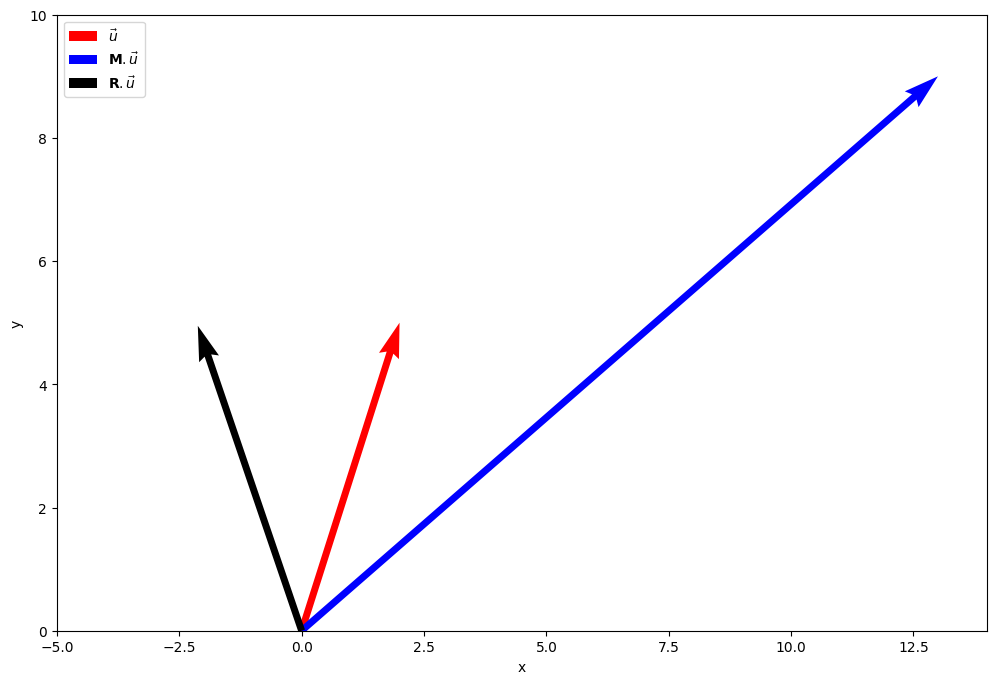

In [13]:
plt.figure(figsize=(12 , 8))

plt.quiver(0, 0, u[0], u[1], color = 'red' , label='$\\vec{u}$',scale_units='xy',scale=1,angles='xy')
plt.quiver(0, 0, v[0], v[1], color = 'blue' , label='$\mathbf{M}.\\vec{u}$',scale_units='xy',scale=1,angles='xy')
plt.quiver(0, 0, w[0], w[1], color = 'k' , label='$\mathbf{R}.\\vec{u}$',scale_units='xy',scale=1,angles='xy')


plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-5,14)
plt.ylim(0,10)

plt.legend(loc='upper left')

## _Exercise_ 1

Given the matrices
$$
\mathbf{A} =
\begin{bmatrix}
2 & -4 \\ 1 & 3
\end{bmatrix}
\qquad
\mathbf{B}
=
\begin{bmatrix}
3 & 2 \\ -2 & 3
\end{bmatrix}
$$
and the vector
$$
\vec{p} =
\begin{bmatrix}
-1 \\ 3
\end{bmatrix}
$$
asnwer the following:



__i)__ Find the vectors $\vec{u}=\mathbf{A}.\vec{p}$ and $\vec{v}=\mathbf{B}.\vec{p}$

__ii)__ Now find the vectors $\mathbf{B}.\vec{u}$ and $\mathbf{A}.\vec{v}$

__iii)__ Use __==__ to cheeck if $\mathbf{B}.\vec{u} = \mathbf{A}.\vec{v}$

__iv)__ Plot the vectors $\mathbf{B}.\vec{u}$ and $\mathbf{A}.\vec{v}$.

\\

__NOTE:__ This means you are really plotting $\mathbf{BA}.\vec{p}$ and $\mathbf{AB}.\vec{p}$, they should not be the same vector. This follows from the fact that the matrix products $\mathbf{AB}$ and $\mathbf{BA}$ are not the same matrix
